# Downsampled Modeling

The purpose of this notebook is to experiment with modeling where the classes are perfectly balanced.

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import scipy.sparse as sp
from scipy.sparse import csr_matrix


In [2]:
with open('df.pkl', 'rb') as f:
    df = pickle.load(f)
df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,1,0,0,1,,do not buy really didn t start to wear them u...,2015,8
1,Teva Men's Pajaro Flip-Flop,5,0,0,1,super flip flop,provides great cushion as well as archsupport,2015,8
3,adidas Men's 10K Lifestyle Runner Sneaker,5,0,6,1,badass,getting what u see,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,3,0,0,1,three stars,small,2015,8
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),5,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015,8
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,1,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002,10
4358811,Women's Bree Suede Moc Snow Joggers,5,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002,10
4358812,Women's CanvasMule Shoes,5,0,0,0,cute,the backless mule is very comfortable cute ...,2002,9
4358813,Birki's Super Birki Unisex Clog,5,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002,3


In [3]:
with open('2ClassDf.pkl', 'rb') as f:
    df2 = pickle.load(f)
df2

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,0,0,0,1,,do not buy really didn t start to wear them u...,2015,8
1,Teva Men's Pajaro Flip-Flop,1,0,0,1,super flip flop,provides great cushion as well as archsupport,2015,8
3,adidas Men's 10K Lifestyle Runner Sneaker,1,0,6,1,badass,getting what u see,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,0,0,0,1,three stars,small,2015,8
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),1,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015,8
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,0,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002,10
4358811,Women's Bree Suede Moc Snow Joggers,1,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002,10
4358812,Women's CanvasMule Shoes,1,0,0,0,cute,the backless mule is very comfortable cute ...,2002,9
4358813,Birki's Super Birki Unisex Clog,1,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002,3


First modeling will be done on a sample size of 50000 and then a test with regular sizes. The next steps would be to downsample 1 `star_rating` to the amount of 0 `star_rating`.

In [4]:
bad_rating = df2[df2['star_rating']==0].sample(25000, random_state=1)
good_rating = df2[df2['star_rating']==1].sample(25000, random_state=1) 

sampled_df = pd.concat([bad_rating, good_rating])

In [5]:
# Sanity check
sampled_df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
1292293,Breckelles Women Blazer-11 Boots,0,0,1,1,four stars,fit as expected they are high so you must kno...,2015,1
1896509,ASICS Men's GEL-Flux Running Shoe,0,0,0,0,asics shoe fit,shoes fit slightly smaller than my other 8 5 s...,2014,10
3768755,Butter Women's Colors Pump,0,0,0,1,nice shoes but runs small,nice shoes good quality the leather is soft ...,2012,12
403781,"GUESS Women's Hula Girl Uptown Carryall, BLUEB...",0,0,0,1,ecelent,ecelent,2015,6
2684055,Steve Madden Men's Disick Boot,0,0,0,1,horrible experience,the shoes arrived stained and the color was ru...,2014,4
...,...,...,...,...,...,...,...,...,...
2940674,Bearpaw Kola II Women Round Toe Suede Snow Boot,1,0,0,1,perfect gift,i purchased these boots for my daughter they a...,2014,1
4358399,Birkenstock 'Livorno' Boot,1,2,2,0,birkenstocks are great,these boots never come off my feet i bought ...,2003,1
724353,Alexis Leroy New Arrival Women Fashion Summer ...,1,0,0,1,five stars,love them,2015,4
3815945,Brown Moose Animal Slippers,1,1,1,1,gift for nephew,wanted some thing fun and these fit the bill ...,2012,11


In [6]:
sampled_df = sampled_df.drop(columns='total_votes')

,product_title,star_rating,helpful_votes,verified_purchase,review_headline,review_body,year,month
1292293,Breckelles Women Blazer-11 Boots,0,0,1,four stars,fit as expected they are high so you must kno...,2015,1
1896509,ASICS Men's GEL-Flux Running Shoe,0,0,0,asics shoe fit,shoes fit slightly smaller than my other 8 5 s...,2014,10
3768755,Butter Women's Colors Pump,0,0,1,nice shoes but runs small,nice shoes good quality the leather is soft ...,2012,12
403781,"GUESS Women's Hula Girl Uptown Carryall, BLUEB...",0,0,1,ecelent,ecelent,2015,6
2684055,Steve Madden Men's Disick Boot,0,0,1,horrible experience,the shoes arrived stained and the color was ru...,2014,4
...,...,...,...,...,...,...,...,...
2940674,Bearpaw Kola II Women Round Toe Suede Snow Boot,1,0,1,perfect gift,i purchased these boots for my daughter they a...,2014,1
4358399,Birkenstock 'Livorno' Boot,1,2,0,birkenstocks are great,these boots never come off my feet i bought ...,2003,1
724353,Alexis Leroy New Arrival Women Fashion Summer ...,1,0,1,five stars,love them,2015,4
3815945,Brown Moose Animal Slippers,1,1,1,gift for nephew,wanted some thing fun and these fit the bill ...,2012,11


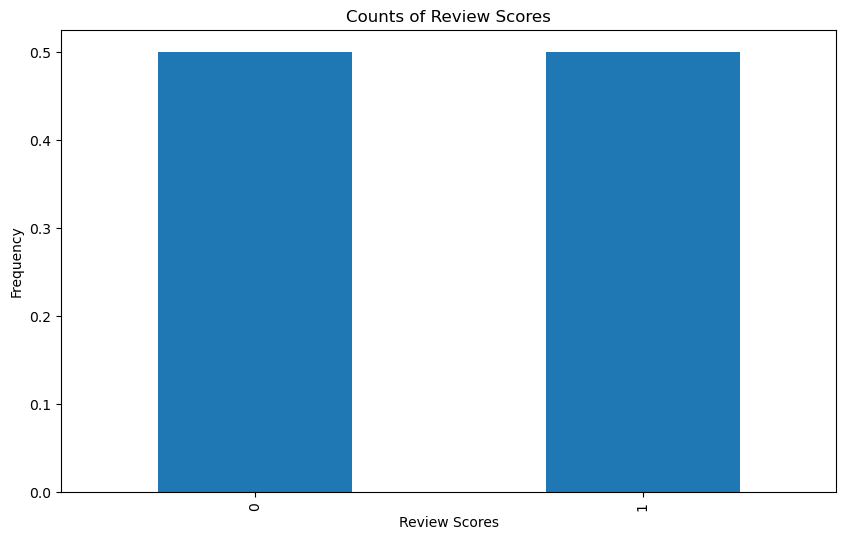

In [7]:
# Sanity check
figure = plt.figure(figsize=(10,6))
sampled_df['star_rating'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.title('Counts of Review Scores')
plt.show()

The classes are now 50/50 without class imbalance which should improve the recall for 0.

#### Train/Test Split

In [8]:
# assigning Reviewer_Score as target variable and everything else as X 
X_sample = sampled_df.drop(columns=['star_rating'])
y_sample = sampled_df['star_rating']

# splitting the data 
X_remainder_sample, X_test_sample, y_remainder_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1, stratify=y_sample)

In [9]:
# Creating a validation set
X_train_sample, X_valid_sample, y_train_sample, y_valid_sample = train_test_split(X_remainder_sample, y_remainder_sample, test_size=0.3, random_state=1, stratify=y_remainder_sample)

#### Vectorization

The `review_body` and `review_headline` need to be vectorized so there is only numeric columns before modeling can be done. For vectorizing, bag of words will be used.

In [10]:
X_train_review_sample = X_train_sample['review_body']
X_valid_review_sample = X_valid_sample['review_body']
X_test_review_sample = X_test_sample['review_body']

# X_remainder will be needed for when cv is being done
X_remainder_review_sample = X_remainder_sample['review_body']

In [11]:
# sampled_df = sampled_df.drop(columns=['product_title', 'review_headline', 'review_body'])

In [12]:
%%time
# Instantiate
stemmer = PorterStemmer()

bag_body = CountVectorizer(stop_words="english", min_df=250)

# Fitting 
bag_body.fit(X_train_review_sample)


# Transform
train_bag_sample = bag_body.transform(X_train_review_sample)
valid_bag_sample = bag_body.transform(X_valid_review_sample)
test_bag_sample = bag_body.transform(X_test_review_sample)

CPU times: total: 1.89 s
Wall time: 1.94 s


In [13]:
%%time
# This one is for X_remainder when cv is not done 

### For X_remainder
bag_body2 = CountVectorizer(stop_words="english", min_df=250)
bag_body2.fit(X_remainder_review_sample)
remainder_bag_sample = bag_body2.transform(X_remainder_review_sample)
test_bag_sample2 = bag_body2.transform(X_test_review_sample)

CPU times: total: 2.17 s
Wall time: 2.16 s


In [14]:
X_train_headline_sample = X_train_sample['review_headline']
X_valid_headline_sample = X_valid_sample['review_headline']
X_test_headline_sample = X_test_sample['review_headline']
# X_remainder will be needed for when cv is being done
X_remainder_headline_sample = X_remainder_sample['review_headline']

In [15]:
%%time
# Instantiate
bag_headline = CountVectorizer(stop_words="english", min_df=50)

# Fitting 
bag_headline.fit(X_train_headline_sample)

# Transform
train_headline_sample = bag_headline.transform(X_train_headline_sample)
valid_headline_sample = bag_headline.transform(X_valid_headline_sample)
test_headline_sample = bag_headline.transform(X_test_headline_sample)

CPU times: total: 406 ms
Wall time: 399 ms


In [16]:
%%time
# For X_remainder
bag_headline2 = CountVectorizer(stop_words="english", min_df=50)
bag_headline2.fit(X_remainder_headline_sample)
remainder_headline_sample = bag_headline2.transform(X_remainder_headline_sample)
test_headline_sample2 = bag_headline2.transform(X_test_headline_sample)

CPU times: total: 453 ms
Wall time: 457 ms


In [17]:
bag_headline.get_feature_names_out()

array(['adorable', 'amazing', 'ankle', 'apart', 'arch', 'asics',
       'awesome', 'bad', 'bag', 'balance', 'beautiful', 'best', 'better',
       'beware', 'big', 'bigger', 'bit', 'black', 'boot', 'boots',
       'bought', 'box', 'buy', 'casual', 'cheap', 'clarks', 'color',
       'comfort', 'comfortable', 'comfy', 'cool', 'crocs', 'cute',
       'daughter', 'day', 'deal', 'design', 'did', 'didn', 'disappointed',
       'don', 'durable', 'easy', 'em', 'excellent', 'expected',
       'extremely', 'fabulous', 'fantastic', 'far', 'fast', 'favorite',
       'feel', 'feels', 'feet', 'fine', 'fit', 'fits', 'flat', 'flip',
       'flop', 'flops', 'foot', 'fun', 'gift', 'good', 'gorgeous', 'got',
       'great', 'half', 'happy', 'hard', 'heel', 'high', 'hiking',
       'husband', 'just', 'large', 'larger', 'leather', 'light',
       'lightweight', 'like', 'liked', 'little', 'long', 'look',
       'looking', 'looks', 'love', 'loved', 'loves', 'men', 'money',
       'narrow', 'need', 'new', 'nic

In [18]:
# combining headline and bag counts
train_count = sp.hstack([train_headline_sample, train_bag_sample])
valid_count = sp.hstack([valid_headline_sample, valid_bag_sample])
test_count = sp.hstack([test_headline_sample, test_bag_sample])

In [19]:
# combining headline and bag counts
remainder_count = sp.hstack([remainder_headline_sample, remainder_bag_sample])
test_count2 = sp.hstack([test_headline_sample2, test_bag_sample2])

In [20]:
train_count

<28000x500 sparse matrix of type '<class 'numpy.int64'>'
	with 333451 stored elements in Compressed Sparse Row format>

In [21]:
body_words = bag_body.get_feature_names_out()
tagged_body_words = ['b_' + feature for feature in body_words]
headline_words = bag_headline.get_feature_names_out()
tagged_headline_words = ['h_' + feature for feature in headline_words]
sample_vocab = tagged_headline_words + tagged_body_words

In [22]:
# FOR X_REMAINDER
body_words2 = bag_body2.get_feature_names_out()
tagged_body_words2 = ['b_' + feature for feature in body_words2]
headline_words2 = bag_headline2.get_feature_names_out()
tagged_headline_words2 = ['h_' + feature for feature in headline_words2]
sample_vocab2 = tagged_headline_words2 + tagged_body_words2

In [23]:
len(sample_vocab)

500

In [24]:
train_count

<28000x500 sparse matrix of type '<class 'numpy.int64'>'
	with 333451 stored elements in Compressed Sparse Row format>

In [25]:
train_df = pd.DataFrame(train_count.toarray(), columns=sample_vocab)
valid_df = pd.DataFrame(valid_count.toarray(), columns=sample_vocab)
test_df = pd.DataFrame(test_count.toarray(), columns=sample_vocab)

In [26]:
# For X_remainder
remainder_df = pd.DataFrame(remainder_count.toarray(), columns=sample_vocab2)
test_df2 = pd.DataFrame(test_count2.toarray(), columns=sample_vocab2)

In [27]:
X_train_sample = X_train_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_valid_sample = X_valid_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_test_sample = X_test_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [28]:
# For X_remainder
X_remainder_sample = X_remainder_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [29]:
combined_train = pd.concat([X_train_sample, train_df], axis=1)
combined_valid = pd.concat([X_valid_sample, valid_df], axis=1)
combined_test = pd.concat([X_test_sample, test_df], axis=1)

In [30]:
# For X_remainder
combined_remainder = pd.concat([X_remainder_sample, remainder_df], axis=1)
combined_test2 = pd.concat([X_test_sample, test_df2], axis=1)

In [31]:
combined_test2

,helpful_votes,total_votes,verified_purchase,year,month,h_10,h_absolutely,h_adorable,h_amazing,h_ankle,...,b_worked,b_working,b_works,b_worn,b_worth,b_wouldn,b_wrong,b_year,b_years,b_zipper
0,1,1,0,2011,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,2014,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2015,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,2014,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2015,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,2015,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,2,2,1,2014,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,1,2014,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,1,2015,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Instantiate
ss = StandardScaler()

# Fit and tranform
X_train_scaled = ss.fit_transform(combined_train)
X_valid_scaled = ss.transform(combined_valid)
X_test_scaled = ss.transform(combined_test)

In [33]:
# For X_remainder
ss2 = StandardScaler()
X_remainder_scaled = ss.fit_transform(combined_remainder)
X_test_scaled2 = ss.transform(combined_test2)

## Logistic Regression

In [34]:
log3 = LogisticRegression(solver='liblinear', C=0.1, random_state=1)
log3.fit(X_train_scaled, y_train_sample)
log3.score(X_test_scaled, y_test_sample)

0.7755

When compared to the imbalanced class results, the accuracy had decreased from 78.01% to 77.55% which is not that big of a difference. The most important part is the recall and precision.

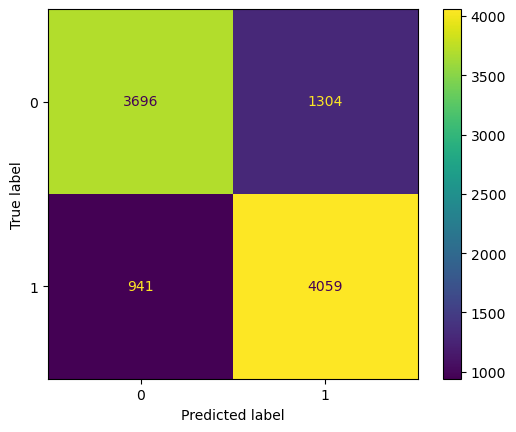

In [35]:
ConfusionMatrixDisplay.from_estimator(log3, X_test_scaled, y_test_sample);

In [36]:
# Get rating predictions
y_pred = log3.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)

# label rows and columnsConfusionMatrixDisplay.from_estimator(log3, X_test_scaled, y_test_sample);
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1"],
    index=["True 0", "True 1"]
)
display(cf_df)

print(classification_report(y_test_sample, y_pred))

,Predicted 0,Predicted 1
True 0,3696,1304
True 1,941,4059


              precision    recall  f1-score   support

           0       0.80      0.74      0.77      5000
           1       0.76      0.81      0.78      5000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



When comparing to our imbalanced class results, the precision and recall of class 0 did increase from 77% to 80% (precision) and 63% to 74%, an increase of 11% which is pretty significant. However, there was a tradeoff as the precision and recall of class 1 had decreased as a result where precision had dropped from 78% to 76% and 88% to 81%. This model is still better than the imbalanced dataset since it is not overpredicting a class over the other.

### Full Dataset

In [38]:
# Grabbing the size of 0 class to downsample class 1 to
size = df2[df2['star_rating']==0].shape[0]
size

1532849

In [39]:
bad_rating = df2[df2['star_rating']==0]
good_rating = df2[df2['star_rating']==1].sample(size, random_state=1) 

sampled_df = pd.concat([bad_rating, good_rating])

In [40]:
# Sanity check
sampled_df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,0,0,0,1,,do not buy really didn t start to wear them u...,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,0,0,0,1,three stars,small,2015,8
7,Olukai Nohea Mesh Shoe - Men's,0,0,0,1,good deal but had to go a full size down,i went a full size down and they fit better bu...,2015,8
9,Alegria Women's Seville Clog,0,0,0,1,too small,the size is misleading,2015,8
12,Versace Collection Black Perforated Leather Lo...,0,1,1,1,four stars,good quality shoes great for casual or busine...,2015,8
...,...,...,...,...,...,...,...,...,...
2630966,Nina Dally Mary Jane (Toddler/Little Kid/Big Kid),1,0,0,1,finally,finally found a comfortable shoe for my daught...,2014,4
3093800,Phenas? Girl's Lovely Sweet Bowknot Leisure Ca...,1,1,1,1,great buy,my daughter love this bag and takes it to scho...,2013,11
293111,Skechers USA Men's Relaxed Fit Memory Foam Sup...,1,0,0,1,five stars,great shoes very comfortable normally wear a...,2015,7
2088909,Brinley Co Womens Lace-up Wedge Bootie,1,0,0,0,beautiful shoes,i was a little worried these would run small b...,2014,9


The 3065698 rows match to 1532849 multiplied by 2.

In [41]:
# Sanity check
sampled_df['star_rating'].value_counts()

0    1532849
1    1532849
Name: star_rating, dtype: int64

In [42]:
# total_votes and helpful_votes has high correlation so had to drop total_votes
sampled_df.drop(columns='total_votes')

,product_title,star_rating,helpful_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,0,0,1,,do not buy really didn t start to wear them u...,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,0,0,1,three stars,small,2015,8
7,Olukai Nohea Mesh Shoe - Men's,0,0,1,good deal but had to go a full size down,i went a full size down and they fit better bu...,2015,8
9,Alegria Women's Seville Clog,0,0,1,too small,the size is misleading,2015,8
12,Versace Collection Black Perforated Leather Lo...,0,1,1,four stars,good quality shoes great for casual or busine...,2015,8
...,...,...,...,...,...,...,...,...
2630966,Nina Dally Mary Jane (Toddler/Little Kid/Big Kid),1,0,1,finally,finally found a comfortable shoe for my daught...,2014,4
3093800,Phenas? Girl's Lovely Sweet Bowknot Leisure Ca...,1,1,1,great buy,my daughter love this bag and takes it to scho...,2013,11
293111,Skechers USA Men's Relaxed Fit Memory Foam Sup...,1,0,1,five stars,great shoes very comfortable normally wear a...,2015,7
2088909,Brinley Co Womens Lace-up Wedge Bootie,1,0,0,beautiful shoes,i was a little worried these would run small b...,2014,9


#### Train/Test Split

In [43]:
# assigning Reviewer_Score as target variable and everything else as X 
X_sample = sampled_df.drop(columns=['star_rating'])
y_sample = sampled_df['star_rating']

# splitting the data 
X_remainder_sample, X_test_sample, y_remainder_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1, stratify=y_sample)

In [44]:
# Creating a validation set
X_train_sample, X_valid_sample, y_train_sample, y_valid_sample = train_test_split(X_remainder_sample, y_remainder_sample, test_size=0.3, random_state=1, stratify=y_remainder_sample)

#### Vectorization

The `review_body` and `review_headline` need to be vectorized so there is only numeric columns before modeling can be done. For vectorizing, bag of words will be used.

In [45]:
X_train_review_sample = X_train_sample['review_body']
X_valid_review_sample = X_valid_sample['review_body']
X_test_review_sample = X_test_sample['review_body']

# X_remainder will be needed for when cv is being done
X_remainder_review_sample = X_remainder_sample['review_body']

In [46]:
# sampled_df = sampled_df.drop(columns=['product_title', 'review_headline', 'review_body'])

In [47]:
%%time
# Instantiate
stemmer = PorterStemmer()

bag_body = CountVectorizer(stop_words="english", min_df=250)

# Fitting 
bag_body.fit(X_train_review_sample)


# Transform
train_bag_sample = bag_body.transform(X_train_review_sample)
valid_bag_sample = bag_body.transform(X_valid_review_sample)
test_bag_sample = bag_body.transform(X_test_review_sample)

CPU times: total: 1min 59s
Wall time: 1min 59s


In [48]:
%%time
# This one is for X_remainder when cv is not done 

### For X_remainder
bag_body2 = CountVectorizer(stop_words="english", min_df=250)
bag_body2.fit(X_remainder_review_sample)
remainder_bag_sample = bag_body2.transform(X_remainder_review_sample)
test_bag_sample2 = bag_body2.transform(X_test_review_sample)

CPU times: total: 2min 17s
Wall time: 2min 17s


In [49]:
X_train_headline_sample = X_train_sample['review_headline']
X_valid_headline_sample = X_valid_sample['review_headline']
X_test_headline_sample = X_test_sample['review_headline']
# X_remainder will be needed for when cv is being done
X_remainder_headline_sample = X_remainder_sample['review_headline']

In [50]:
%%time
# Instantiate
bag_headline = CountVectorizer(stop_words="english", min_df=50)

# Fitting 
bag_headline.fit(X_train_headline_sample)

# Transform
train_headline_sample = bag_headline.transform(X_train_headline_sample)
valid_headline_sample = bag_headline.transform(X_valid_headline_sample)
test_headline_sample = bag_headline.transform(X_test_headline_sample)

CPU times: total: 25.1 s
Wall time: 25.1 s


In [51]:
%%time
# For X_remainder
bag_headline2 = CountVectorizer(stop_words="english", min_df=50)
bag_headline2.fit(X_remainder_headline_sample)
remainder_headline_sample = bag_headline2.transform(X_remainder_headline_sample)
test_headline_sample2 = bag_headline2.transform(X_test_headline_sample)

CPU times: total: 28.8 s
Wall time: 28.8 s


In [52]:
bag_headline.get_feature_names_out()

array(['00', '10', '100', ..., 'zipper', 'zippers', 'zumba'], dtype=object)

In [53]:
# combining headline and bag counts
train_count = sp.hstack([train_headline_sample, train_bag_sample])
valid_count = sp.hstack([valid_headline_sample, valid_bag_sample])
test_count = sp.hstack([test_headline_sample, test_bag_sample])

In [54]:
# combining headline and bag counts
remainder_count = sp.hstack([remainder_headline_sample, remainder_bag_sample])
test_count2 = sp.hstack([test_headline_sample2, test_bag_sample2])

In [55]:
train_count

<1716790x8640 sparse matrix of type '<class 'numpy.int64'>'
	with 30931693 stored elements in Compressed Sparse Row format>

In [56]:
body_words = bag_body.get_feature_names_out()
tagged_body_words = ['b_' + feature for feature in body_words]
headline_words = bag_headline.get_feature_names_out()
tagged_headline_words = ['h_' + feature for feature in headline_words]
sample_vocab = tagged_headline_words + tagged_body_words

In [57]:
# FOR X_REMAINDER
body_words2 = bag_body2.get_feature_names_out()
tagged_body_words2 = ['b_' + feature for feature in body_words2]
headline_words2 = bag_headline2.get_feature_names_out()
tagged_headline_words2 = ['h_' + feature for feature in headline_words2]
sample_vocab2 = tagged_headline_words2 + tagged_body_words2

In [58]:
len(sample_vocab)

8640

In [59]:
train_count

<1716790x8640 sparse matrix of type '<class 'numpy.int64'>'
	with 30931693 stored elements in Compressed Sparse Row format>

In [60]:
train_sparse = csr_matrix(train_count)
train_df = pd.DataFrame.sparse.from_spmatrix(train_sparse, columns=sample_vocab)
valid_sparse = csr_matrix(valid_count)
valid_df = pd.DataFrame.sparse.from_spmatrix(valid_sparse, columns=sample_vocab)
# valid_df = pd.SparseDataFrame(valid_count, columns=sample_vocab)
test_sparse = csr_matrix(test_count)
test_df = pd.DataFrame.sparse.from_spmatrix(test_sparse, columns=sample_vocab)
# test_df = pd.SparseDataFrame(test_count, columns=sample_vocab)

In [61]:
# For X_remainder
remainder_sparse = csr_matrix(remainder_count)
remainder_df = pd.DataFrame.sparse.from_spmatrix(remainder_sparse, columns=sample_vocab2)

test_sparse2 = csr_matrix(test_count2)
test_df2 = pd.DataFrame.sparse.from_spmatrix(test_sparse2, columns=sample_vocab2)

# remainder_df = pd.DataFrame(remainder_count.toarray(), columns=sample_vocab2)
# test_df2 = pd.DataFrame(test_count2.toarray(), columns=sample_vocab2)

In [62]:
X_train_sample = X_train_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_valid_sample = X_valid_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_test_sample = X_test_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [63]:
# For X_remainder
X_remainder_sample = X_remainder_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [64]:
combined_train = pd.concat([X_train_sample, train_df], axis=1)
combined_valid = pd.concat([X_valid_sample, valid_df], axis=1)
combined_test = pd.concat([X_test_sample, test_df], axis=1)

In [65]:
# For X_remainder
combined_remainder = pd.concat([X_remainder_sample, remainder_df], axis=1)
combined_test2 = pd.concat([X_test_sample, test_df2], axis=1)

In [66]:
combined_test2

,helpful_votes,total_votes,verified_purchase,year,month,h_00,h_10,h_100,h_1000,h_10m,...,b_zipped,b_zipper,b_zippered,b_zippers,b_zipping,b_zips,b_zone,b_zoo,b_zoom,b_zumba
0,0,0,1,2012,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,2014,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2015,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2012,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2015,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613135,0,0,1,2014,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613136,1,1,1,2014,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613137,0,1,1,2015,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613138,0,0,1,2013,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Processing the conversion of dense matrix to sparse matrix for scaling
batch_size = 100000
n = int(np.ceil(len(combined_train) / batch_size)) # number of batches
sparse_matrices = [] # used to hold the each batch of sparse matrices 

for i in range(n):
    start_i = i * batch_size
    end_i = (i + 1) * batch_size
    # an if statement so the index doesn't go above the max range of the dataframe
    if end_i > len(combined_train):
        end_i = None # setting None as that is the last index of the dataframe
    batch = combined_train.iloc[start_i:end_i]
    sparse_matrix = sp.csr_matrix(batch.values)
    sparse_matrices.append(sparse_matrix)

combined_train = sp.vstack(sparse_matrices)

In [72]:
# Processing the conversion of dense matrix to sparse matrix for scaling
batch_size = 100000
n = int(np.ceil(len(combined_valid) / batch_size)) # number of batches
sparse_matrices = [] # used to hold the each batch of sparse matrices 

for i in range(n):
    start_i = i * batch_size
    end_i = (i + 1) * batch_size
    # an if statement so the index doesn't go above the max range of the dataframe
    if end_i > len(combined_valid):
        end_i = None # setting -1 as that is the last index of the dataframe
    batch = combined_valid.iloc[start_i:end_i]
    sparse_matrix = sp.csr_matrix(batch.values)
    sparse_matrices.append(sparse_matrix)

combined_valid = sp.vstack(sparse_matrices)

In [73]:
# Processing the conversion of dense matrix to sparse matrix for scaling
batch_size = 100000
n = int(np.ceil(len(combined_test) / batch_size)) # number of batches
sparse_matrices = [] # used to hold the each batch of sparse matrices 

for i in range(n):
    start_i = i * batch_size
    end_i = (i + 1) * batch_size
    # an if statement so the index doesn't go above the max range of the dataframe
    if end_i > len(combined_test):
        end_i = None # setting None as that is the last index of the dataframe
    batch = combined_test.iloc[start_i:end_i]
    sparse_matrix = sp.csr_matrix(batch.values)
    sparse_matrices.append(sparse_matrix)

combined_test = sp.vstack(sparse_matrices)

In [92]:
# Processing the conversion of dense matrix to sparse matrix for scaling
batch_size = 100000
n = int(np.ceil(len(combined_remainder) / batch_size)) # number of batches
sparse_matrices = [] # used to hold the each batch of sparse matrices 

for i in range(n):
    start_i = i * batch_size
    end_i = (i + 1) * batch_size
    # an if statement so the index doesn't go above the max range of the dataframe
    if end_i > len(combined_remainder):
        end_i = None # setting None as that is the last index of the dataframe
    batch = combined_remainder.iloc[start_i:end_i]
    sparse_matrix = sp.csr_matrix(batch.values)
    sparse_matrices.append(sparse_matrix)

combined_remainder = sp.vstack(sparse_matrices)

In [98]:
# Processing the conversion of dense matrix to sparse matrix for scaling
batch_size = 100000
n = int(np.ceil(len(combined_test2) / batch_size)) # number of batches
sparse_matrices = [] # used to hold the each batch of sparse matrices 

for i in range(n):
    start_i = i * batch_size
    end_i = (i + 1) * batch_size
    # an if statement so the index doesn't go above the max range of the dataframe
    if end_i > len(combined_test2):
        end_i = None # setting None as that is the last index of the dataframe
    batch = combined_test2.iloc[start_i:end_i]
    sparse_matrix = sp.csr_matrix(batch.values)
    sparse_matrices.append(sparse_matrix)

combined_test2 = sp.vstack(sparse_matrices)

In [74]:
# Instantiate
ss = StandardScaler(with_mean=False) # need with_mean=False for sparse matrix

# Fit and tranform
X_train_scaled = ss.fit_transform(combined_train)
X_valid_scaled = ss.transform(combined_valid)
X_test_scaled = ss.transform(combined_test)

In [99]:
# For X_remainder
ss = StandardScaler(with_mean=False)
X_remainder_scaled = ss.fit_transform(combined_remainder)
X_test_scaled2 = ss.transform(combined_test2)

## Logistic Regression

The logistic regression will be the model with the best parameters for logistic regression from the sample modeling.

In [76]:
log3 = LogisticRegression(solver='liblinear', C=0.1, random_state=1)
log3.fit(X_train_scaled, y_train_sample)
log3.score(X_test_scaled, y_test_sample)

0.8072267345141403

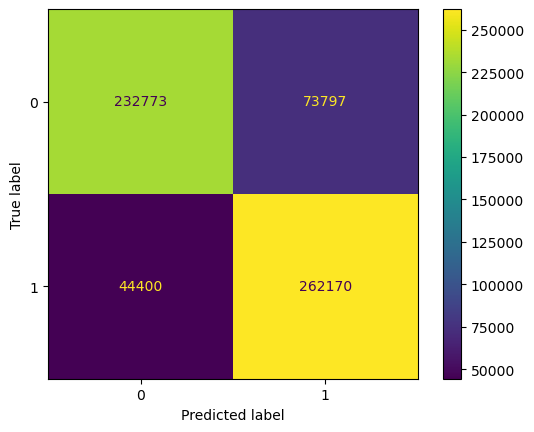

In [77]:
ConfusionMatrixDisplay.from_estimator(log3, X_test_scaled, y_test_sample);

In [78]:
# Get rating predictions
y_pred = log3.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1"],
    index=["True 0", "True 1"]
)
display(cf_df)

print(classification_report(y_test_sample, y_pred))

,Predicted 0,Predicted 1
True 0,232773,73797
True 1,44400,262170


              precision    recall  f1-score   support

           0       0.84      0.76      0.80    306570
           1       0.78      0.86      0.82    306570

    accuracy                           0.81    613140
   macro avg       0.81      0.81      0.81    613140
weighted avg       0.81      0.81      0.81    613140



In [80]:
#### DOES NOT RUN DUE TO MEMORY ERROR
# word_counts = pd.DataFrame({"counts":log3.coef_[0]}, index=combined_train.columns).sort_values("counts", ascending=False)
# word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
# plt.title("Top 30 most predictive features of a good review")
# plt.ylabel("coeff")
# plt.xticks(rotation=45)
# plt.show()

AttributeError: columns not found

## XGBoost

In [108]:
%%time
estimators = [('model', XGBClassifier())]

pipe = Pipeline(estimators)

param_grid = {
    'model': [XGBClassifier()],
    'model__max_depth': [2, 3, 4, 5],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__n_estimators': [100, 200, 300],
}

grid_boost = GridSearchCV(pipe, param_grid, cv=5, verbose=2)
fittedgrid_boost = grid_boost.fit(X_remainder_scaled, y_remainder_sample)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100; total time=  25.4s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
    

In [113]:
# Get the best parameters and score
best_params = grid_boost.best_params_
best_score = grid_boost.best_score_

In [114]:
best_params

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=300, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__n_estimators': 300}

The best hyper parameter for XGBoost is when `learning_rate` is 0.1, `max_depth` is 5, and `n_estimators` is 300.
The model seems to improving still since the best hyper parameter were the highest max_depth and n_estimators allowed so the model might be able to improve if it is set higher.

In [115]:
y_pred = grid_boost.predict(X_test_scaled2)
print(classification_report(y_test_sample, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78    306570
           1       0.77      0.82      0.79    306570

    accuracy                           0.79    613140
   macro avg       0.79      0.79      0.79    613140
weighted avg       0.79      0.79      0.79    613140



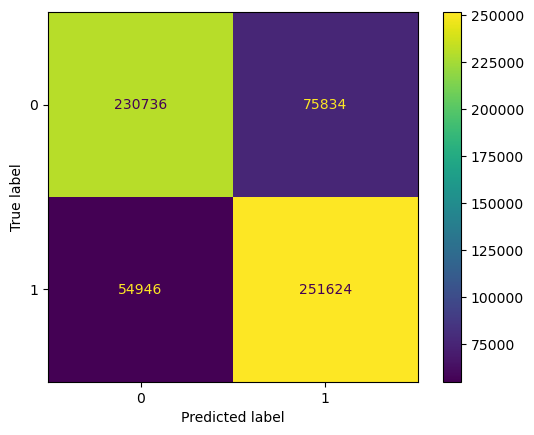

In [116]:
ConfusionMatrixDisplay.from_estimator(grid_boost, X_test_scaled2, y_test_sample);

In [117]:
grid_boost.feature_importances_

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [107]:
%%time
estimators = [('model', XGBClassifier())]

pipe = Pipeline(estimators)

param_grid = {
    'model': [XGBClassifier()],
    'model__max_depth': [5,6,7],
    'model__learning_rate': [0.1],
    'model__n_estimators': [500, 750, 1000],
}

grid_boost2 = GridSearchCV(pipe, param_grid, cv=5, verbose=2)
fittedgrid_boost2 = grid_boost2.fit(X_remainder_scaled, y_remainder_sample)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.1, model__max_depth=5, model__n_estimators=500; total time= 3.4min


KeyboardInterrupt: 